# Page Rank and HITS
### Laptsuev_RP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

During with lab we will check the change of results of Page Rank and HITS algorithms with respect to the values of $\alpha$ and number of iterations.

### Task 1.

a) Firstly let's make experiment for small network (Zachary or any other small one). Set any 3 distinct values for $\alpha$, fix the number of iterations, and run Page Rank. Plot results PR values wrt $\alpha$

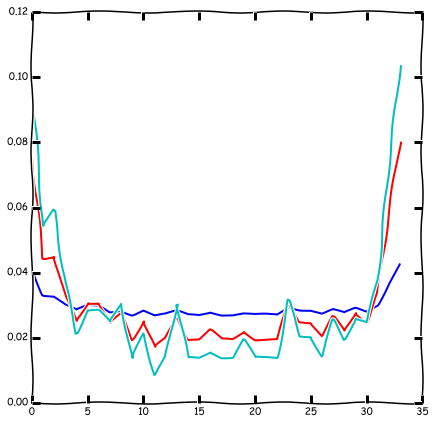

In [9]:
G = nx.karate_club_graph()
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)    
alphas=np.linspace(0.1, 0.9,3) 
l=list()
for i in alphas: 
    pr=nx.pagerank(G,i) 
    l.append(pr.values())
plt.plot(pr.keys(),l[0])
plt.plot(pr.keys(),l[1])
plt.plot(pr.keys(),l[2])

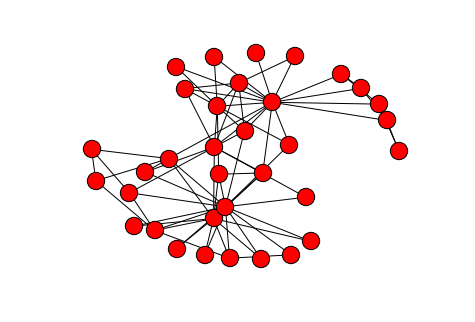

In [24]:
nx.draw(G)

b) Do the same for the number of iterations(the same values)

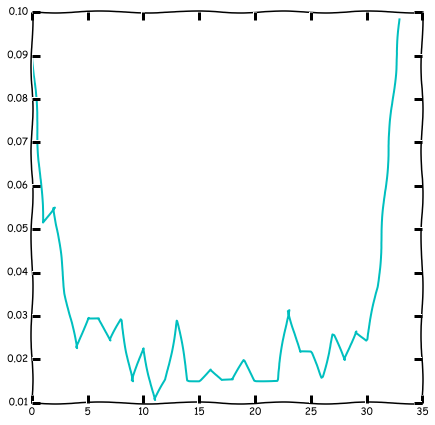

In [31]:
G = nx.karate_club_graph()
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)    
iter=np.linspace(25,1000000,3) 
l=list()
for i in iter: 
    pr=nx.pagerank(G,0.8,max_iter=int(i)) 
    l.append(pr.values())
plt.plot(pr.keys(),l[0])
plt.plot(pr.keys(),l[1])
plt.plot(pr.keys(),l[2])

c) Plot Page-Rank vs. Degree centrality dependency is close to linear.

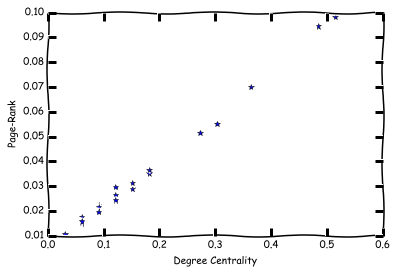

In [26]:
# Continue here
pr = nx.pagerank(G, alpha=0.8)
pr = pr.values()
d = nx.degree_centrality(G)
d = d.values()

plt.plot(d, pr, '*')
plt.xlabel('Degree Centrality')
plt.ylabel('Page-Rank')

### Task 2.

Let's switch to a bigger network. Download [political blogs](http://networkdata.ics.uci.edu/data/polblogs/polblogs.gml) network. Check its basic properties. Run HITS algorithm. Try to inverstigate the top nodes.

In [43]:
# Continue here
# 
G=nx.read_gml("polblogs2.gml")
z=G.edges()
for i in reversed(range(len(z))):
    if z[i][0]==z[i][1]:
        del z[i]
polblogs=nx.DiGraph()
polblogs.add_edges_from(set(z))
G=polblogs

In [44]:
G.is_directed()
A = nx.adjacency_matrix(G)

P = nx.DiGraph(A)

In [78]:
(h, a) = nx.hits(P)
a = a.values()
h = h.values()

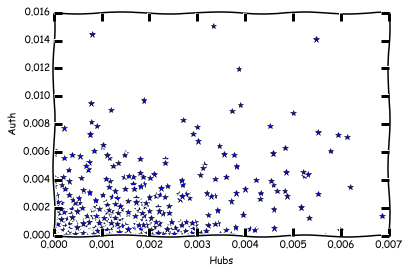

In [79]:
plt.plot(h,a, '*')
plt.xlabel('Hubs')
plt.ylabel('Auth')

In [47]:
idx = np.argsort(a)
idx[-1]

1096

In [60]:
G.nodes()[idx[-1]]

u'dailykos.com'

Vizualize top Authorities colored in blue with sizes proportional to A-value and their Common Hubs coloured in green with size proportional to H-value.

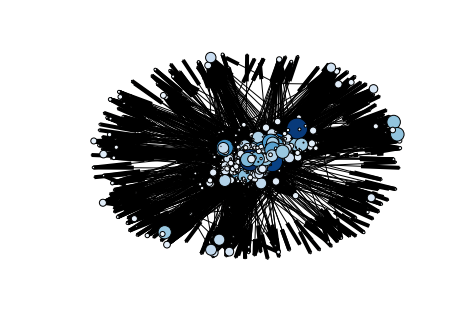

In [81]:
pos = nx.spring_layout(G) 
nx.draw(G,
          pos,
          nodelist=G.nodes(),
          node_size = [d*30000 for d in a],
          node_color=a,
          font_size=8,
          cmap=plt.cm.Blues,
          )

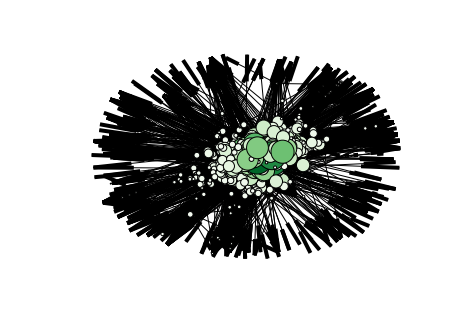

In [87]:
nx.draw(G,
          pos,
          nodelist=G.nodes(),
          node_size = [d*150000 for d in h],
          node_color=h,
          font_size=8,
          cmap=plt.cm.Greens,
          )

In [ ]:
nx.draw(G,
          pos,
          nodelist=G.nodes(),
          node_size = [d*30000 for d in a],
          node_color=a,
          font_size=8,
          cmap=plt.cm.Blues,
          )

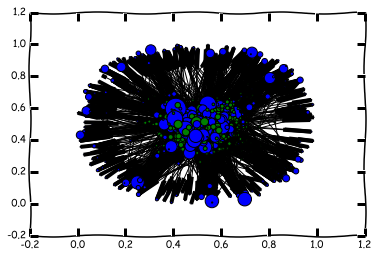

In [95]:
s=list()
for i in range(len(a)):
    s.append(0)
color=list()
for i in range(len(a)):
    if (h[i]<=a[i]):
        s[i]=30000*a[i]
        color.append("b")
    if (h[i]>a[i]):
        s[i]=20000*h[i]
        color.append("g")
nx.draw_networkx(G,with_labels=False,node_size=s,node_color=color)